In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       35886 non-null  int64  
 1   phase    35886 non-null  object 
 2   E-1      35886 non-null  float64
 3   E-2      35886 non-null  float64
 4   E-3      35886 non-null  float64
 5   E-4      35886 non-null  float64
 6   E-5      35886 non-null  float64
 7   E-6      35886 non-null  float64
 8   E-7      35886 non-null  float64
 9   E-8      35886 non-null  float64
 10  E-9      35886 non-null  float64
 11  E-10     35886 non-null  float64
 12  E-11     35886 non-null  float64
 13  E-12     35886 non-null  float64
 14  E-13     35886 non-null  float64
 15  E-14     35886 non-null  float64
 16  E-15     35886 non-null  float64
 17  E-16     35886 non-null  float64
 18  E-17     35886 non-null  float64
 19  E-18     35886 non-null  float64
 20  E-19     35886 non-null  float64
 21  E-20     358

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       23924 non-null  int64  
 1   E-1      23924 non-null  float64
 2   E-2      23924 non-null  float64
 3   E-3      23924 non-null  float64
 4   E-4      23924 non-null  float64
 5   E-5      23924 non-null  float64
 6   E-6      23924 non-null  float64
 7   E-7      23924 non-null  float64
 8   E-8      23924 non-null  float64
 9   E-9      23924 non-null  float64
 10  E-10     23924 non-null  float64
 11  E-11     23924 non-null  float64
 12  E-12     23924 non-null  float64
 13  E-13     23924 non-null  float64
 14  E-14     23924 non-null  float64
 15  E-15     23924 non-null  float64
 16  E-16     23924 non-null  float64
 17  E-17     23924 non-null  float64
 18  E-18     23924 non-null  float64
 19  E-19     23924 non-null  float64
 20  E-20     23924 non-null  float64
 21  N-1      239

In [6]:
train_data.head()

,id,phase,E-1,E-2,E-3,E-4,E-5,E-6,E-7,E-8,...,Z-13,Z-14,Z-15,Z-16,Z-17,Z-18,Z-19,Z-20,station,network
0,0,After Coda End,-40.060604,-260.707855,-2295.125732,-5077.934570,-6510.237793,-6507.307617,-6570.841309,-6639.744141,...,-1636.636719,-481.137634,1250.591431,3423.129150,5408.335938,7083.473633,8639.500977,9888.334961,AOS,HT
1,1,After Coda End,-918.338989,-130.808212,-180.710327,-888.181763,-1270.482300,-1396.425903,-1328.800293,-1324.853394,...,-606.994751,-341.463318,-216.040726,-132.499832,415.490448,750.097290,1068.296143,1360.592407,AOS,HT
2,2,S Wave,-19588.193359,-22775.435547,-14151.219727,-1106.306152,479.042145,8777.960938,27075.169922,24998.861328,...,-6982.862305,-3364.717285,6015.947266,-10893.664062,-9635.690430,2515.936035,5403.634766,7697.293945,AC04,C1
3,3,Before P Arrival,71.364502,102.589439,140.858856,113.558861,72.772079,97.952866,132.099426,98.619576,...,-33.640625,-28.372875,-31.518494,-40.343090,-43.658840,-37.447033,-41.053375,-54.754852,AOS,HT
4,4,After Coda End,11264.663086,16095.182617,16701.796875,15911.804688,13841.098633,11352.826172,9862.090820,9329.799805,...,122089.867188,141905.125000,157348.359375,169389.234375,178161.437500,185418.484375,191004.015625,193284.250000,AMT,HP


In [7]:
train_data['phase'].value_counts()

After Coda End      16562
S Wave              13322
Before P Arrival     3780
P Wave               1862
Coda End              120
P Arrival             120
S Arrival             120
Name: phase, dtype: int64

In [8]:
train_data['station'].value_counts()

AOS     17943
AC04    11962
AMT      5981
Name: station, dtype: int64

In [9]:
train_data['network'].value_counts()

HT    17943
C1    11962
HP     5981
Name: network, dtype: int64

In [10]:
#LABELING PHASE VALUES
label = {
    'phase' : {
        'Before P Arrival' : 0,
        'P Arrival' : 1,
        'P Wave' : 2,
        'S Arrival' : 3,
        'S Wave' : 4,
        'Coda End' : 5,
        'After Coda End' : 6,
    }
}

train_data.replace(label, inplace=True)
train_data['phase'].value_counts()

6    16562
4    13322
0     3780
2     1862
1      120
3      120
5      120
Name: phase, dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       35886 non-null  int64  
 1   phase    35886 non-null  int64  
 2   E-1      35886 non-null  float64
 3   E-2      35886 non-null  float64
 4   E-3      35886 non-null  float64
 5   E-4      35886 non-null  float64
 6   E-5      35886 non-null  float64
 7   E-6      35886 non-null  float64
 8   E-7      35886 non-null  float64
 9   E-8      35886 non-null  float64
 10  E-9      35886 non-null  float64
 11  E-10     35886 non-null  float64
 12  E-11     35886 non-null  float64
 13  E-12     35886 non-null  float64
 14  E-13     35886 non-null  float64
 15  E-14     35886 non-null  float64
 16  E-15     35886 non-null  float64
 17  E-16     35886 non-null  float64
 18  E-17     35886 non-null  float64
 19  E-18     35886 non-null  float64
 20  E-19     35886 non-null  float64
 21  E-20     358

<AxesSubplot:xlabel='station', ylabel='count'>

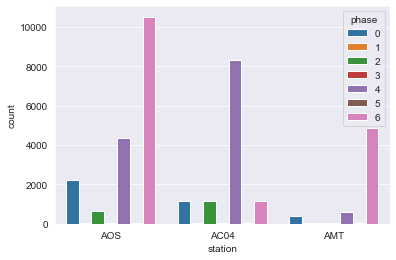

In [12]:
sns.countplot(x='station', data=train_data, hue='phase')

<AxesSubplot:xlabel='network', ylabel='count'>

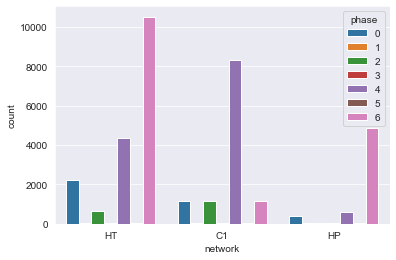

In [13]:
sns.countplot(x='network', data=train_data, hue='phase')

In [14]:
#ONE HOT ENCDOING STATION COLUMN
Station = train_data[['station']]
Station = pd.get_dummies(Station, drop_first=True)
Station.head()

,station_AMT,station_AOS
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [15]:
#ONE HOT ENCODING NETWORK COLUMN
Network = train_data[['network']]
Network = pd.get_dummies(Network, drop_first=True)
Network.head()

,network_HP,network_HT
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [16]:
final_train = pd.concat([train_data, Station, Network], axis=1)
final_train.drop(['station', 'network'], axis=1, inplace=True)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35886 entries, 0 to 35885
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           35886 non-null  int64  
 1   phase        35886 non-null  int64  
 2   E-1          35886 non-null  float64
 3   E-2          35886 non-null  float64
 4   E-3          35886 non-null  float64
 5   E-4          35886 non-null  float64
 6   E-5          35886 non-null  float64
 7   E-6          35886 non-null  float64
 8   E-7          35886 non-null  float64
 9   E-8          35886 non-null  float64
 10  E-9          35886 non-null  float64
 11  E-10         35886 non-null  float64
 12  E-11         35886 non-null  float64
 13  E-12         35886 non-null  float64
 14  E-13         35886 non-null  float64
 15  E-14         35886 non-null  float64
 16  E-15         35886 non-null  float64
 17  E-16         35886 non-null  float64
 18  E-17         35886 non-null  float64
 19  E-18

In [17]:
#TEST DATA

In [18]:
station = test_data[['station']]
station = pd.get_dummies(station, drop_first=True)
station.head()

,station_AMT,station_AOS
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


In [19]:
network = test_data[['network']]
network = pd.get_dummies(network, drop_first=True)
network.head()

,network_HP,network_HT
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


In [20]:
final_test = pd.concat([test_data, station, network], axis=1)
final_test.drop(['station', 'network'], axis=1, inplace=True)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23924 entries, 0 to 23923
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23924 non-null  int64  
 1   E-1          23924 non-null  float64
 2   E-2          23924 non-null  float64
 3   E-3          23924 non-null  float64
 4   E-4          23924 non-null  float64
 5   E-5          23924 non-null  float64
 6   E-6          23924 non-null  float64
 7   E-7          23924 non-null  float64
 8   E-8          23924 non-null  float64
 9   E-9          23924 non-null  float64
 10  E-10         23924 non-null  float64
 11  E-11         23924 non-null  float64
 12  E-12         23924 non-null  float64
 13  E-13         23924 non-null  float64
 14  E-14         23924 non-null  float64
 15  E-15         23924 non-null  float64
 16  E-16         23924 non-null  float64
 17  E-17         23924 non-null  float64
 18  E-18         23924 non-null  float64
 19  E-19

In [21]:
#MODELLING

In [22]:
X_train = final_train.drop(['id', 'phase'], axis=1)
y_train = final_train['phase']
X_test = final_test.drop(['id'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(35886, 64)
(35886,)
(23924, 64)


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(max_features='sqrt', max_depth=15, min_samples_split=2, min_samples_leaf=1, n_estimators=400)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [25]:
print("Accuracy on Traning set: ",rfc.score(X_train,y_train))
hasil_rfc = pd.DataFrame({
    'id' : final_test['id'],
    'phase' : pred
})
hasil_rfc['phase'].value_counts()

Accuracy on Traning set:  0.9557766259822772


6    13193
4     6710
0     2926
2      955
3       60
1       40
5       40
Name: phase, dtype: int64

In [26]:
hasil_rfc.to_csv('submission2.csv', index=False)